<a href="https://colab.research.google.com/github/Dywinar/Research-Pandas-Polars-duckdb/blob/main/Research_Pandas%2C_Polars_duckdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка_Создания_df

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import psutil
import random
import polars as pl
import duckdb
import seaborn as sns
import tracemalloc
num_rows = 10**6
data = {
    'A': np.random.rand(num_rows),
    'B': np.random.rand(num_rows),
    'C': np.random.randint(0, 100, size=num_rows),
    'D': np.random.choice(['cat', 'dog', 'bird', 'fish'], size=num_rows)
}

df = pd.DataFrame(data)
df.head(10)


,A,B,C,D
0,0.162912,0.139011,25,dog
1,0.736884,0.724074,14,dog
2,0.429454,0.657637,24,dog
3,0.753595,0.898399,47,bird
4,0.234419,0.597112,31,cat
5,0.081731,0.440554,74,cat
6,0.324753,0.323781,2,cat
7,0.531033,0.250969,55,cat
8,0.124318,0.524259,44,fish
9,0.164502,0.496909,44,dog


In [7]:
file_path = 'large_file.csv'
df.to_csv(file_path, index=False)

#Декораторы_Функции

In [10]:
def memory_decorator(func):
    def wrapper(*args, **kwargs):
      tracemalloc.start()
      r = func(*args, **kwargs)
      result = tracemalloc.get_traced_memory()[1]/(1024)**2
      tracemalloc.stop()
      return result
    return wrapper

In [11]:
def time_decorator(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    func(*args, **kwargs)
    end_time = time.time()
    load_time = end_time - start_time
    return load_time
  return wrapper

In [12]:
def memory_usage_psutil():
    """Возвращает текущий расход памяти процесса в МБ"""
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / (1024 * 1024)

#Анализ загрузки

Половина пройдена
Половина пройдена
Половина пройдена


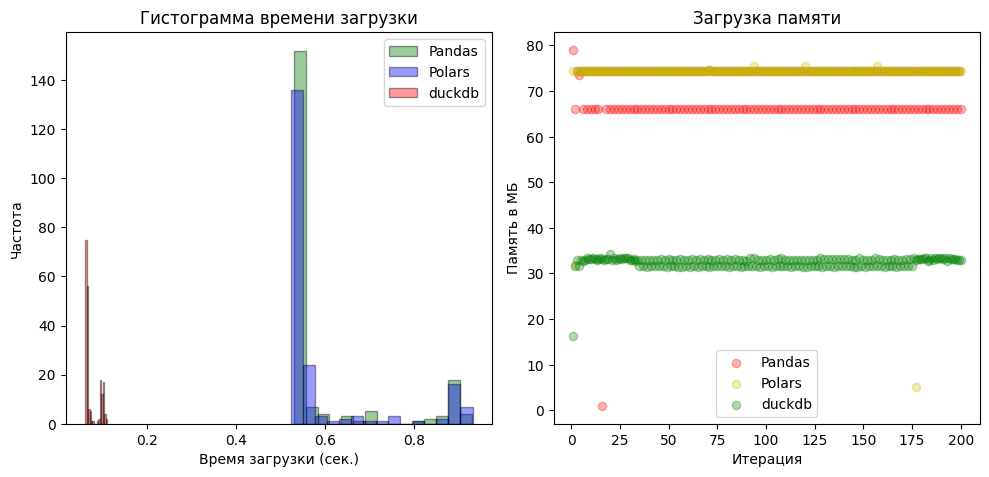

In [ ]:
def load_and_measure(file_path):
    """Функция для загрузки файла и измерения времени и использования памяти"""
    start_time = time.time()
    start_mem = memory_usage_psutil()

    df = pd.read_csv(file_path)

    end_time = time.time()
    end_mem = memory_usage_psutil()

    load_time = end_time - start_time
    mem_usage = end_mem - start_mem

    return load_time, mem_usage

file_path = 'large_file.csv'
ls = []
for i in range(1,201):
    load_time, mem_usage = load_and_measure(file_path)
    ls.append([i, load_time, mem_usage])
    if i == 50:
      print('Половина пройдена')
ls = np.array(ls)
fig, ax = plt.subplots(1,2,  figsize=(10, 5))
ax[0].hist(ls[:,1], bins=15, color='g', edgecolor='black', alpha=0.4, label='Pandas')
ax[0].set_xlabel('Время загрузки (сек.)')
ax[0].set_ylabel('Частота')
ax[0].set_title('Гистограмма времени загрузки')
ax[1].scatter(ls[:, 0], ls[:, 2],  color='r', label ='Pandas', alpha=0.3)
ax[1].set_xlabel('Итерация')
ax[1].set_ylabel('Память в МБ')
ax[1].set_title('Загрузка памяти')
def load_and_measure(file_path):
    """Функция для загрузки файла и измерения времени и использования памяти"""
    start_time = time.time()
    start_mem = memory_usage_psutil()
    df = pd.read_csv(file_path)
    end_time = time.time()
    end_mem = memory_usage_psutil()

    load_time = end_time - start_time
    mem_usage = end_mem - start_mem
    return load_time, mem_usage

ls = []
for i in range(1,201):
    load_time, mem_usage = load_and_measure(file_path)
    ls.append([i, load_time, abs(mem_usage)])
    if i == 50:
      print('Половина пройдена')
ls = np.array(ls)
ax[0].hist(ls[:,1], bins=15, color='b', edgecolor='black', alpha=0.4, label='Polars')
ax[1].scatter(ls[:, 0], ls[:, 2],  color='y', label ='Polars', alpha=0.3)

def load_and_measure(file_path):
    """Функция для загрузки файла и измерения времени и использования памяти"""
    start_time = time.time()
    start_mem = memory_usage_psutil()
    cont = duckdb.connect()
    df = cont.execute("""
        SELECT *
        FROM '/content/large_file.csv'
    """)
    end_time = time.time()
    end_mem = memory_usage_psutil()

    load_time = end_time - start_time
    mem_usage = end_mem - start_mem
    return load_time, mem_usage

ls = []
for i in range(1,201):
    load_time, mem_usage = load_and_measure(file_path)
    ls.append([i, load_time, abs(mem_usage)])
    if i == 50:
      print('Половина пройдена')
ls = np.array(ls)

ax[0].hist(ls[:,1], bins=15, color='r', edgecolor='black', alpha=0.4, label='duckdb')
ax[1].scatter(ls[:, 0], ls[:, 2],  color='g', label ='duckdb', alpha=0.3)

ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#Анализ работы функций

#Скорость работы

In [17]:
@time_decorator
def sum_mean_max_min_pd(x: str) -> float:
    """Функция вычисления скорости разных функций Pandas"""
    result = df[['A', 'B', 'C']].apply(x)
func = ['sum', 'mean', 'max', 'min']
df = pd.read_csv(file_path)
ls_sk = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_pd(func[q])
    lq.append(load_time)
  ls_sk.append(lq)

In [18]:
@time_decorator
def sum_mean_max_min_plr(x: str) -> float:
    """Функция вычисления скорости разных функций Polars"""
    if x == 'sum':
       result = df.select(["A", "B", 'C']).sum()
    elif x == 'min':
      result = df.select(["A", "B", 'C']).min()
    elif x == 'mean':
      result = df.select(["A", "B", 'C']).mean()
    elif x == 'max':
      result =  df.select(["A", "B", 'C']).max()

func = ['sum', 'mean', 'max', 'min']
df = pl.read_csv(file_path)
ls_1_sk = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_plr(func[q])
    lq.append(load_time)
  ls_1_sk.append(lq)

In [19]:
@time_decorator
def sum_mean_max_min_duckdb(x: str) -> float:
    """Функция вычисления скорости разных функций duckdb"""
    if x == 'sum':
      df = cont.execute("""
        SELECT SUM(A), SUM(B), SUM(C)
        FROM large_data
    """)
    elif x == 'min':
      df = cont.execute("""
        SELECT MIN(A), MIN(B), MIN(C)
        FROM large_data
    """)
    elif x == 'mean':
      df = cont.execute("""
        SELECT MEAN(A), MEAN(B), MEAN(C)
        FROM large_data
    """)

    elif x == 'max':
      df = cont.execute("""
        SELECT MAX(A), MAX(B), MAX(C)
        FROM large_data
    """)
cont = duckdb.connect()


cont.execute("""
    CREATE TABLE large_data AS
    SELECT * FROM read_csv_auto('/content/large_file.csv')
""")
ls_2_sk = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_duckdb(func[q])
    lq.append(load_time)
  ls_2_sk.append(lq)

#Загрузка памяти функция

In [13]:
@memory_decorator
def sum_mean_max_min_pd(x: str) -> float:
    """Функция вычисления загрузки памяти функций Pandas"""
    result = df[['A', 'B', 'C']].apply(x)
func = ['sum', 'mean', 'max', 'min']
df = pd.read_csv(file_path)
ls = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_pd(func[q])
    lq.append(load_time)
  ls.append(lq)

In [14]:
@memory_decorator
def sum_mean_max_min_plr(x: str) -> float:
    """Функция вычисления загрузки памяти функций Polars"""
    if x == 'sum':
       result = df.select(["A", "B", 'C']).sum()
    elif x == 'min':
      result = df.select(["A", "B", 'C']).min()
    elif x == 'mean':
      result = df.select(["A", "B", 'C']).mean()
    elif x == 'max':
      result =  df.select(["A", "B", 'C']).max()

func = ['sum', 'mean', 'max', 'min']
df = pl.read_csv(file_path)
ls_1 = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_plr(func[q])
    lq.append(load_time)
  ls_1.append(lq)

In [15]:
@memory_decorator
def sum_mean_max_min_duckdb(x: str) -> float:
    """Функция вычисления загрузки памяти функций duckdb"""
    if x == 'sum':
      df = cont.execute("""
        SELECT SUM(A), SUM(B), SUM(C)
        FROM large_data
    """)
    elif x == 'min':
      df = cont.execute("""
        SELECT MIN(A), MIN(B), MIN(C)
        FROM large_data
    """)
    elif x == 'mean':
      df = cont.execute("""
        SELECT MEAN(A), MEAN(B), MEAN(C)
        FROM large_data
    """)

    elif x == 'max':
      df = cont.execute("""
        SELECT MAX(A), MAX(B), MAX(C)
        FROM large_data
    """)
cont = duckdb.connect()


cont.execute("""
    CREATE TABLE large_data AS
    SELECT * FROM read_csv_auto('/content/large_file.csv')
""")
ls_2 = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_duckdb(func[q])
    lq.append(load_time)
  ls_2.append(lq)

#График

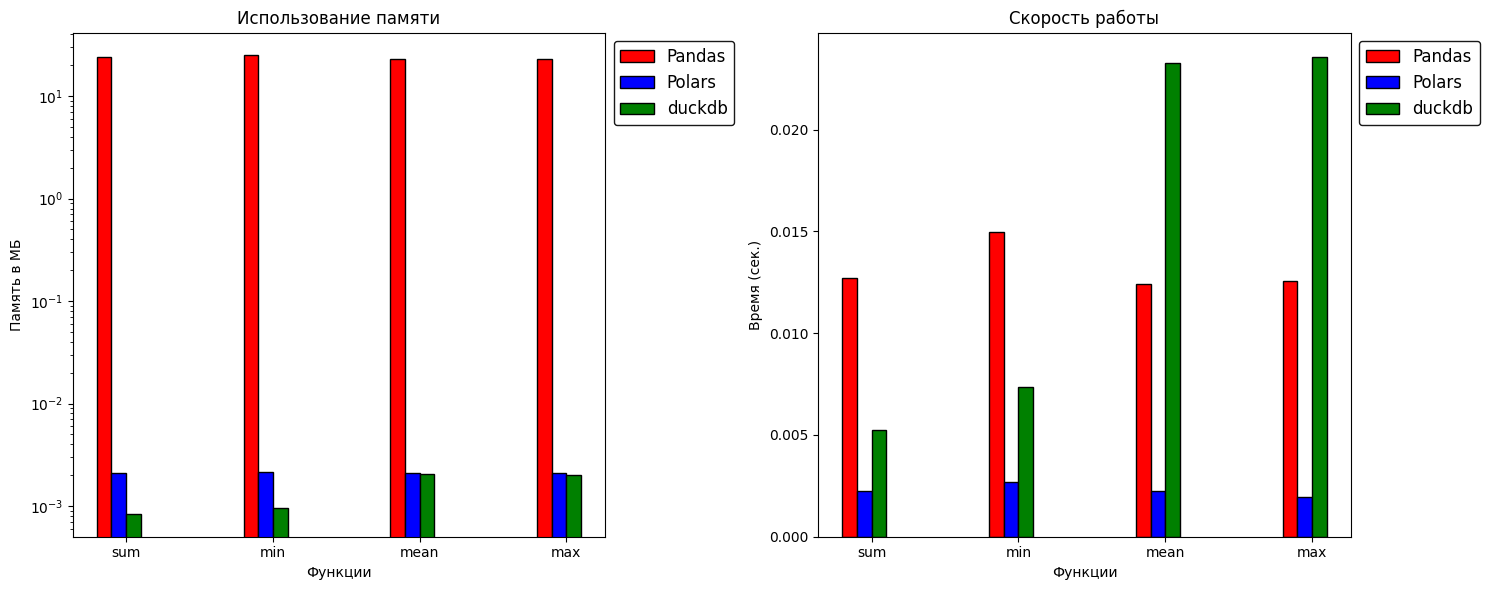

In [20]:
libraries = ['Pandas', 'Polars', 'duckdb']
functions = ['sum', 'min', 'mean', 'max']
memory_usage = [ls, ls_1, ls_2]
speed = [ls_sk, ls_1_sk, ls_2_sk]
al = [memory_usage, speed]
x = np.array([1, 3, 5, 7])
width = 0.2
nm = ['Память в МБ', 'Время (сек.)']
nm_2 = ['Использование памяти', 'Скорость работы']
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
cl = ['r', 'b', 'g', 'y']


for z in range(len(al)):
    for i in range(len(functions)):
        for j in range(len(memory_usage)):
            avg_memory_usage = np.array(al[z][j][i]).mean()
            ax[z].bar(x[i] + j * width, avg_memory_usage, width, label=libraries[j] if i == 0 else "", color=cl[j], edgecolor='black')

    if z == 0:
        ax[z].set_yscale('log')

    ax[z].set_xticks(x + width * (len(functions) - 1) / 2)
    ax[z].set_xticklabels(functions)
    ax[z].set_xlabel('Функции')
    ax[z].set_ylabel(nm[z])
    ax[z].set_title(nm_2[z])
    ax[z].legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), frameon=True, framealpha=0.9, facecolor='white', edgecolor='black')
plt.tight_layout()
plt.show()

#Анализ фильтрации

#Скорость фильтрации

In [ ]:
@time_decorator
def filter_data_pd():
  """Функция вычисления скорости фильтрации данных Pandas """
  result = df[df['A'] > 0.9]
  result_1 = df[df['B'] < 0.1]
  result_2 = df[df['C'] == 10]
  result_3 = df[df['D']== 'dog']
filter_data_pd.__doc__

In [ ]:
df = pd.read_csv(file_path)
ls_f_s = []
for i in range(1, 2501):
  ls_f_s.append(filter_data_pd())
  print(i) if i % 1000 == 0 else None

1000
2000


In [ ]:
@time_decorator
def filter_data_plr():
  """Функция вычисления скорости фильтрации данных Polars """
  result = df.filter(pl.col('A') > 0.9)
  result_1 = df.filter(pl.col('B') < 0.1)
  result_2 = df.filter(pl.col('C') == 10)
  result_3 = df.filter(pl.col('D') == 'dog')
filter_data_plr.__doc__

In [ ]:
df = pl.read_csv(file_path)
ls_1_f_s = []
for i in range(1, 2501):
  ls_1_f_s.append(filter_data_plr())
  print(i) if i % 1000 == 0 else None

1000
2000


In [ ]:
@time_decorator
def filter_data_duckdb():
  """Функция вычисления скорости фильтрации данных duckdb """
  result = cont.execute(
      """
      SELECT *
      FROM large_data
      WHERE A > 0.9
      """
  )

  result_1 = cont.execute(
      """
      SELECT *
      FROM large_data
      WHERE B < 0.1
      """
  )

  result_2 = cont.execute(
        """
        SELECT *
        FROM large_data
        WHERE C = 10
        """
    )
  result_2 = cont.execute(
          """
          SELECT *
          FROM large_data
          WHERE D = 'dog'
          """
  )

filter_data_duckdb.__doc__

In [ ]:
cont = duckdb.connect()
cont.execute("""
    CREATE TABLE large_data AS
    SELECT * FROM read_csv_auto('/content/large_file.csv')
""")
ls_2_f_s = []
for i in range(1, 2501):
  ls_2_f_s.append(filter_data_duckdb())
  print(i) if i % 1000 == 0 else None

1000
2000


#Загрузка памяти фильтрации

In [ ]:
@memory_decorator
def filter_data_pd():
  """Функция вычисления скорости фильтрации данных Pandas """
  result = df[df['A'] > 0.9]
  result_1 = df[df['B'] < 0.1]
  result_2 = df[df['C'] == 10]
  result_3 = df[df['D']== 'dog']
filter_data_pd.__doc__

In [ ]:
df = pd.read_csv(file_path)
ls_f = []
for i in range(1, 2501):
  ls_f.append(filter_data_pd())
  print(i) if i % 1000 == 0 else None

1000
2000


In [ ]:
@memory_decorator
def filter_data_plr():
  """Функция вычисления скорости фильтрации данных Polars """
  result = df.filter(pl.col('A') > 0.9)
  result_1 = df.filter(pl.col('B') < 0.1)
  result_2 = df.filter(pl.col('C') == 10)
  result_3 = df.filter(pl.col('D') == 'dog')
filter_data_plr.__doc__

In [ ]:
df = pl.read_csv(file_path)
ls_1_f = []
for i in range(1, 2501):
  ls_1_f.append(filter_data_plr())
  print(i) if i % 1000 == 0 else None

1000
2000


In [ ]:
@memory_decorator
def filter_data_duckdb():
  """Функция вычисления скорости фильтрации данных duckdb """
  result = cont.execute(
      """
      SELECT *
      FROM large_data
      WHERE A > 0.9
      """
  )

  result_1 = cont.execute(
      """
      SELECT *
      FROM large_data
      WHERE B < 0.1
      """
  )

  result_2 = cont.execute(
        """
        SELECT *
        FROM large_data
        WHERE C = 10
        """
    )
  result_2 = cont.execute(
          """
          SELECT *
          FROM large_data
          WHERE D = 'dog'
          """
  )

filter_data_duckdb.__doc__

In [ ]:
cont = duckdb.connect()
cont.execute("""
    CREATE TABLE large_data AS
    SELECT * FROM read_csv_auto('/content/large_file.csv')
""")
ls_2_f = []
for i in range(1, 2501):
  ls_2_f.append(filter_data_duckdb())
  print(i) if i % 1000 == 0 else None

1000
2000


#График

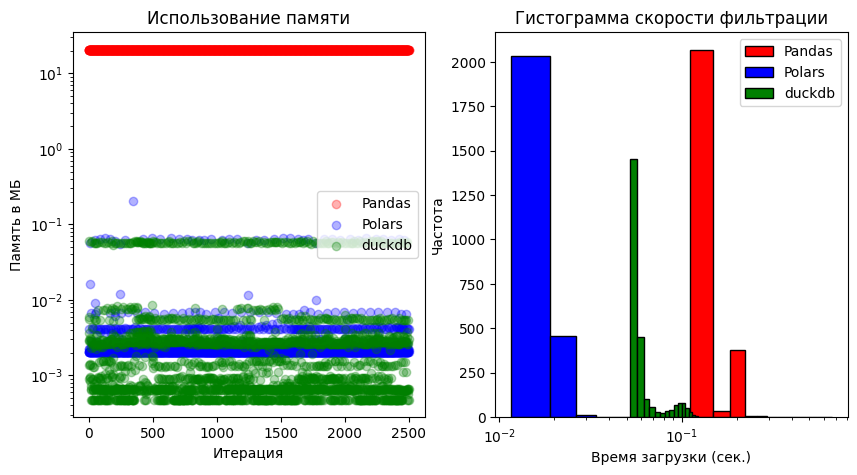

In [ ]:
speed_f = [ls_f_s,ls_1_f_s, ls_2_f_s ]
memory_f = [ls_f, ls_1_f, ls_2_f]
nm = ['Pandas', 'Polars', 'duckdb']
cl = ['r', 'b', 'g']
al_f = [memory_f, speed_f]
fig, ax,   = plt.subplots(1,2,  figsize=(10, 5))
for i in range(len(al_f)):
  for z in range(len(speed_f)):
    if i == 0:
      ax[i].scatter([i for i in range(len(speed_f[i]))], al_f[i][z], label=nm[z], color=cl[z], alpha=0.3)
      ax[i].set_xlabel('Итерация')
      ax[i].set_ylabel('Память в МБ')
      ax[i].set_title('Использование памяти')
      ax[i].legend()
      ax[i].set_yscale('log')
    else:
      ax[i].hist(al_f[i][z], bins=15, edgecolor='black',label=nm[z], color=cl[z])
      ax[i].set_xlabel('Время загрузки (сек.)')
      ax[i].set_ylabel('Частота')
      ax[i].set_title('Гистограмма скорости фильтрации')
      ax[i].legend()
      ax[i].set_xscale('log')

plt.show()
